<a href="https://colab.research.google.com/github/aSafarpoor/DIP/blob/main/DIP_HW1_99210301.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q1

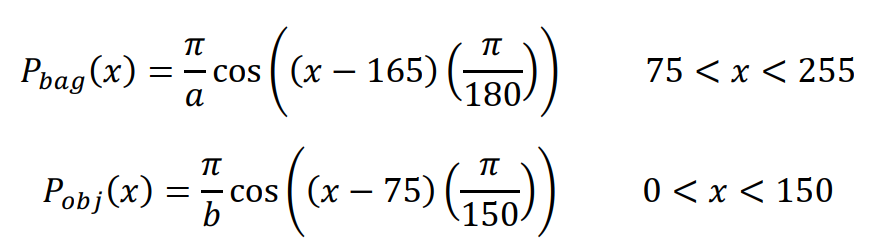

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq, fft2, ifft2
from  scipy import stats
import cv2
from google.colab.patches import cv2_imshow
from math import exp

In [ ]:
a = 180
b = 300

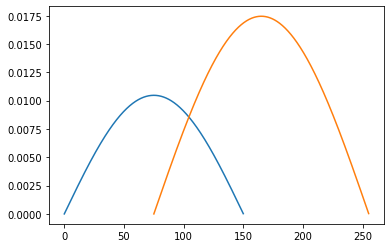

In [ ]:
x_obj = np.arange(0,150,0.1)
x_bag = np.arange(75,255,0.1)
y_obj = np.pi/b * np.cos((x_obj-75)*np.pi/150)
y_bag = np.pi/a * np.cos((x_bag-165)*np.pi/180)
plt.plot(x_obj,y_obj)
plt.plot(x_bag,y_bag)
plt.show()

# Q2

## part1:

In [ ]:
a = [[0,0,0,0],[0,1,1,0],[0,1,0,0],[0,0,0,0]]
np.fft.fft2(a)

array([[ 3.+0.j, -1.-2.j, -1.+0.j, -1.+2.j],
       [-1.-2.j, -1.+2.j,  1.+0.j,  1.+0.j],
       [-1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j],
       [-1.+2.j,  1.+0.j,  1.+0.j, -1.-2.j]])

In [ ]:
k = [[1,1,1,1],[1,-1j,-1,1j],[1,-1,1,-1],[1,1j,-1,-1j]]
np.dot(np.dot(k,a),k)

array([[ 3.+0.j, -1.-2.j, -1.+0.j, -1.+2.j],
       [-1.-2.j, -1.+2.j,  1.+0.j,  1.+0.j],
       [-1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j],
       [-1.+2.j,  1.+0.j,  1.+0.j, -1.-2.j]])

In [ ]:
(np.fft.fft2(a) == np.dot(np.dot(k,a),k)).all()

True

it means this formula is True!!

In [ ]:
b = [[0,0,0,0],[0,1,1,0],[0,0,1,0],[0,0,0,0]]
print(np.fft.fft2(b))
print("-------------------------------")
print(np.fft.fft2(a))


[[ 3.+0.j -2.-1.j  1.+0.j -2.+1.j]
 [-1.-2.j  0.+1.j -1.+0.j  2.+1.j]
 [-1.+0.j  0.+1.j  1.+0.j  0.-1.j]
 [-1.+2.j  2.-1.j -1.+0.j  0.-1.j]]
-------------------------------
[[ 3.+0.j -1.-2.j -1.+0.j -1.+2.j]
 [-1.-2.j -1.+2.j  1.+0.j  1.+0.j]
 [-1.+0.j  1.+0.j -1.+0.j  1.+0.j]
 [-1.+2.j  1.+0.j  1.+0.j -1.-2.j]]


# Q3

In [ ]:
img = cv2.imread("sample1.jpg")

In [ ]:
img_size = img.shape
img_size

(225, 225, 3)

In [ ]:
X_train = []
img = np.array(img)
img = img.reshape(225*225,3)
img.shape

(50625, 3)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
 
model = pca.fit_transform(img)

In [ ]:
out = pca.transform(img)

In [ ]:
out.shape

(50625, 3)

In [ ]:
img[0] , out[0]

(array([ 64, 123, 115], dtype=uint8),
 array([ 39.00849799,  -5.45120393, -16.18807855]))

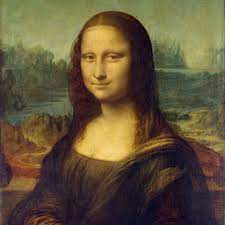

In [ ]:
img = img.reshape(225,225,3)
cv2_imshow(img)

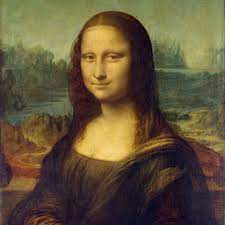

In [ ]:
out = out.reshape(225,225,3)
cv2_imshow(img)

In [ ]:
c0 = out[:,:,0]
c1 = out[:,:,1]
c2 = out[:,:,2]

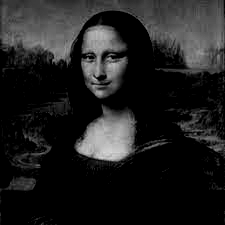

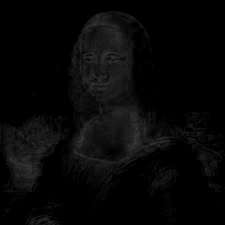

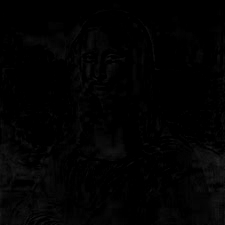

In [ ]:
cv2_imshow(c0)
print()
cv2_imshow(c1)
print()
cv2_imshow(c2)

In [ ]:
color0 = img[:,:,0]
color1 = img[:,:,1]
color2 = img[:,:,2]

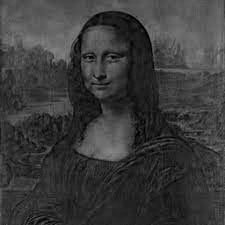

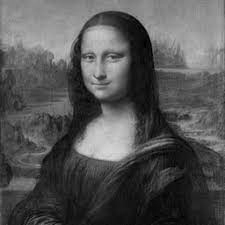

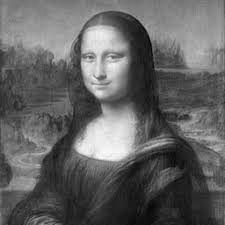

In [ ]:
cv2_imshow(color0)
print()
cv2_imshow(color1)
print()
cv2_imshow(color2)

In [ ]:
c0

array([[ 39.00849799,  43.95198858,  52.11340865, ...,  62.50855205,
         46.24680524,   7.20623213],
       [ 37.36066779,  42.30415838,  48.81774825, ...,  64.15638225,
         46.91659803,   7.20623213],
       [ 34.66055887,  39.60404947,  45.52208785, ...,  64.82617504,
         48.56442823,   7.20623213],
       ...,
       [ 11.02416181,  -4.85509907, -22.46341071, ..., -41.64369017,
        -34.89690751,   8.47415657],
       [  6.68320195,  -8.14726984, -27.10214631, ..., -41.34591443,
        -35.94918623,   1.42959818],
       [ 12.53048866, -16.82918955, -34.35977026, ..., -30.78914044,
        -48.53976597,  -2.9995615 ]])

In [ ]:
def normalizer(c):
    ma,mi = max(map(max, c)),min(map(min, c))
    for i in range(len(c)):
        for j in range(len(c[0])):
            c[i][j] -= mi
            c[i][j] /= (ma-mi) 
            c[i][j] *= 255
    ma,mi = max(map(max, c)),min(map(min, c))
    return c

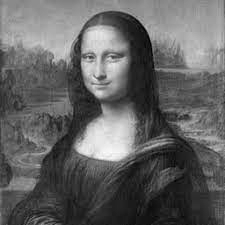

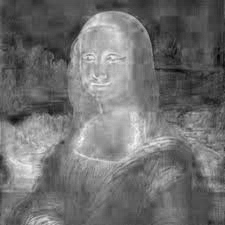

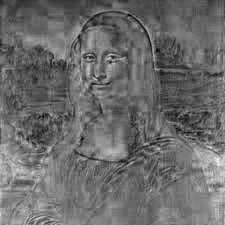

In [ ]:
cv2_imshow(cn0)
print()
cv2_imshow(cn1)
print()
cv2_imshow(cn2)

# Q4

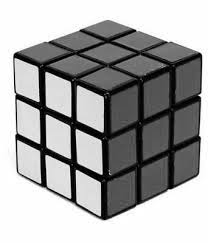

In [ ]:
img = cv2.imread('sample2.jpg',0)
cv2_imshow(img)

In [ ]:
def mask_creator(x,y,r):
    m = np.ones((x,y))
    if x%2 == 0:
        mid_x = (x-1)/2
    else:
        mid_x = int(x/2)
    if y%2 == 0:
        mid_y = (y-1)/2
    else:
        mid_y = int(y/2) 
    print(x,y,mid_x,mid_y)
    for i in range(int(mid_x)-r-1,int(mid_x)+r+2):
        for j in range(int(mid_y)-r-1,int(mid_y)+r+2):
            if (i-mid_x)**2+(j-mid_y)**2 <= r**2:
                try:
                    m[i][j]=0
                except:
                    pass
    return m

In [ ]:
fft_img = fft2(img)

In [ ]:
fft_img.shape

(243, 208)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


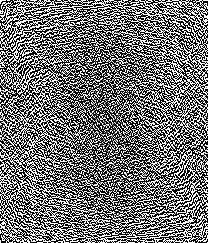

In [ ]:
cv2_imshow(fft_img)

In [ ]:
mask = mask_creator(243,208,r=20)

243 208 121 103.5


In [ ]:
masked_fft_img = mask * fft_img

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


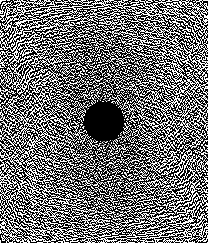

In [ ]:
cv2_imshow(masked_fft_img)

In [ ]:
ifft_img = ifft2(masked_fft_img)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


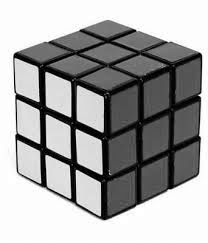

In [ ]:
cv2_imshow(ifft_img)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


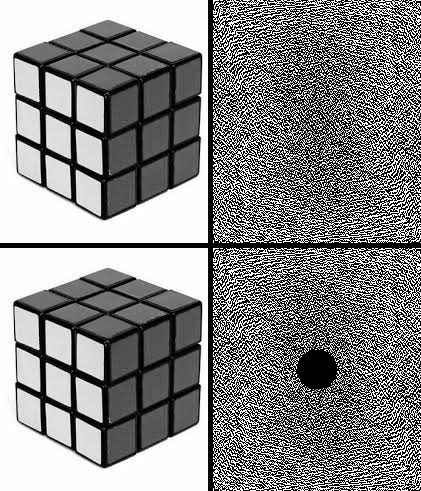

In [ ]:
# concatanate image Horizontally
black_line = np.zeros((243,5))
Hori1 = np.concatenate((img, black_line ,fft_img), axis=1)
Hori2 = np.concatenate((ifft_img, black_line, masked_fft_img), axis=1)

black_line = np.zeros((5,421))
# concatanate image Vertically
Verti = np.concatenate((Hori1, black_line , Hori2), axis=0)
  
# cv2.imshow('HORIZONTAL', Hori)
cv2_imshow(Verti)

In [ ]:
def inverse_mask_creator(x,y,r):
    m = np.zeros((x,y))
    if x%2 == 0:
        mid_x = (x-1)/2
    else:
        mid_x = int(x/2)
    if y%2 == 0:
        mid_y = (y-1)/2
    else:
        mid_y = int(y/2) 
    print(x,y,mid_x,mid_y)
    for i in range(int(mid_x)-r-1,int(mid_x)+r+2):
        for j in range(int(mid_y)-r-1,int(mid_y)+r+2):
            if (i-mid_x)**2+(j-mid_y)**2 <= r**2:
                try:
                    m[i][j]=1
                except:
                    pass
    return m

In [ ]:
mask = inverse_mask_creator(243,208,r=120)

243 208 121 103.5


In [ ]:
masked_fft_img = mask * fft_img

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


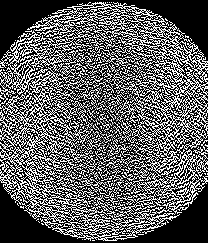

In [ ]:
cv2_imshow(masked_fft_img)

In [ ]:
ifft_img = ifft2(masked_fft_img)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


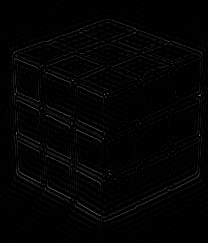

In [ ]:
cv2_imshow(ifft_img)

In [ ]:
def image_normalizer(c):
    ma,mi = max(map(max, c)),min(map(min, c))
    for i in range(len(c)):
        for j in range(len(c[0])):
            c[i][j] -= mi
            c[i][j] /= (ma-mi) 
            c[i][j] *= 255
    return c

In [ ]:
normal_img = image_normalizer(ifft_img)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


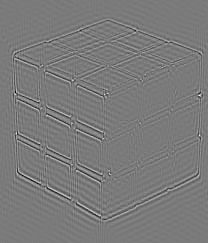

In [ ]:
cv2_imshow(normal_img)

In [ ]:
ifft_img

array([[121.22872189+0.39808633j, 124.01224965+0.71917194j,
        124.17807776-0.32444098j, ..., 120.1140123 +2.44344652j,
        121.66528739+0.93552706j, 123.10077778+0.91638335j],
       [120.47345481+0.24394817j, 122.27748818+0.56009724j,
        122.13651987-0.88136348j, ..., 121.25242129+3.56243238j,
        121.98960628+1.39232776j, 123.17261896+1.07193218j],
       [120.73475837-0.1234103j , 121.30426324+0.72143799j,
        120.18636561-0.75059859j, ..., 122.93036739+2.52151828j,
        123.11945343+0.23196032j, 124.19644051+0.35695861j],
       ...,
       [121.84071896+0.74331993j, 123.90966012+1.0972997j ,
        121.82137624+1.7278156j , ..., 122.9795265 +0.81419438j,
        125.09686809-0.00383428j, 124.36412313+0.55330895j],
       [122.36348524+0.84653318j, 124.74737218+1.56314438j,
        123.26777708+1.790799j  , ..., 121.99683774+0.19930074j,
        124.25320038-0.39101915j, 124.52710479+0.42731891j],
       [122.08810281+0.58328454j, 124.96710895+1.20373976j

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


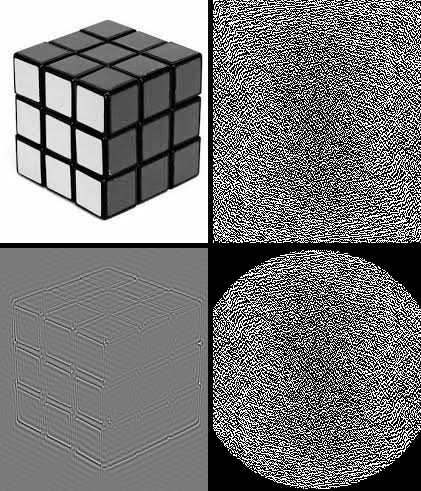

In [ ]:
# concatanate image Horizontally
black_line = np.zeros((243,5))
Hori1 = np.concatenate((img, black_line ,fft_img), axis=1)
Hori2 = np.concatenate((normal_img, black_line, masked_fft_img), axis=1)

black_line = np.zeros((5,421))
# concatanate image Vertically
Verti = np.concatenate((Hori1, black_line , Hori2), axis=0)
  
# cv2.imshow('HORIZONTAL', Hori)
cv2_imshow(Verti)

based on 
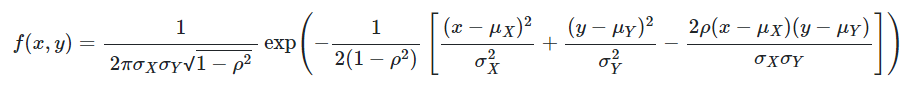

In [ ]:
def f_function(x,y,miux=0,miuy=0,sigmax=1,sigmay=1):
    #we assume ro is 0,  because there is no correlation between x,yand simplicity in formula
    part1 = 1/(2*np.pi*sigmax*sigmay)
    part2 = (-1/2)*( ((x-miux)**2)/(sigmax**2) + ((y-miuy)**2)/(sigmay**2) )
    out = part1*exp(part2)
    return out

In [ ]:
def create_matrix(x,y,sigmax=1,sigmay=1,normalize=True,max_val=255):
    matrix = np.zeros((x,y))
    miux = (x-1)/2
    miuy = (y-1)/2
    for i in range(x):
        for j in range(y):
            matrix[i][j] = f_function(i,j,miux,miuy,sigmax,sigmay)
    if normalize:
        max_criteria = max(map(max,matrix)) 
        matrix = max_val*matrix/max_criteria
    return matrix

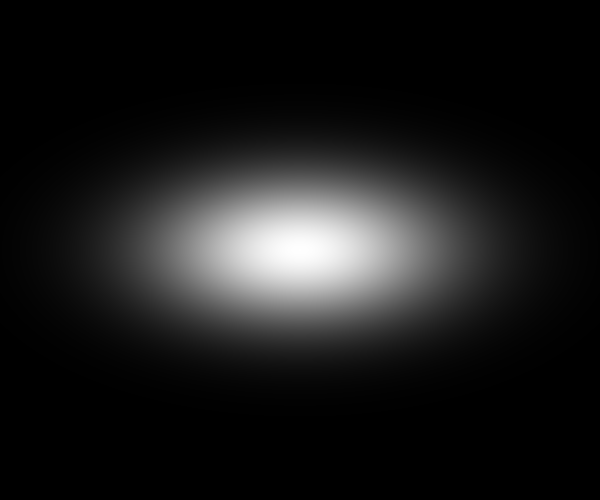

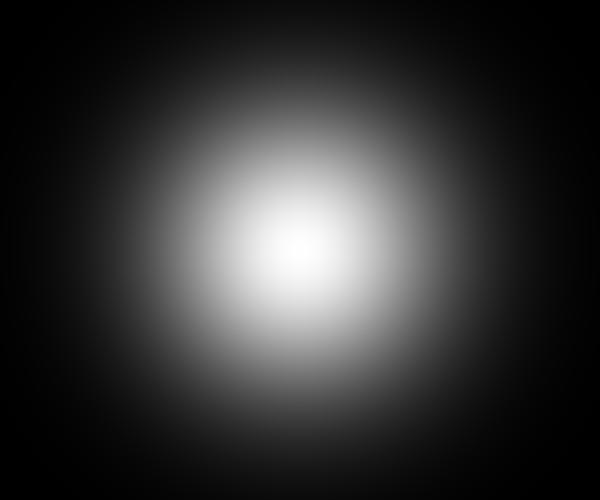

In [ ]:
k1 = create_matrix(500,600,sigmax=50,sigmay=100)
k2 = create_matrix(500,600,sigmax=100,sigmay=100)
cv2_imshow(k1)
print("")
cv2_imshow(k2)

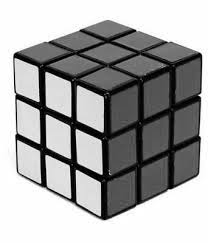

In [ ]:
cv2_imshow(img)

In [ ]:
img.shape

(243, 208)

In [ ]:
mask = create_matrix(243,208,sigmax=70,sigmay=50,max_val=255)

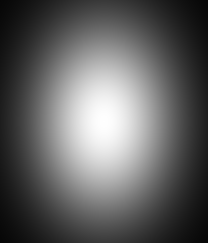

In [ ]:
cv2_imshow(mask)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


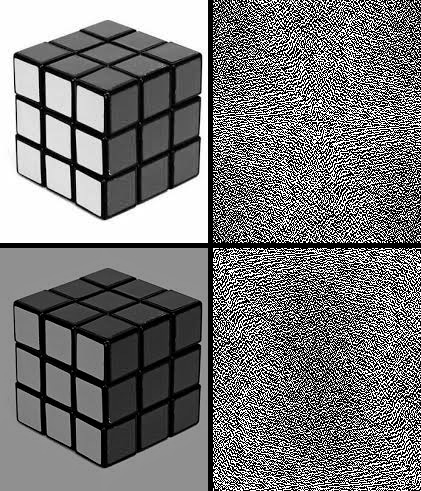

In [ ]:
mask = create_matrix(243,208,sigmax=150,sigmay=150,max_val=1)
masked_fft_img = mask * fft_img
ifft_img = ifft2(masked_fft_img)

# concatanate image Horizontally
black_line = np.zeros((243,5))
shisted_fft = np.fft.fftshift(fft_img)

Hori1 = np.concatenate((img, black_line ,shisted_fft), axis=1)
Hori2 = np.concatenate((ifft_img, black_line, masked_fft_img), axis=1)

black_line = np.zeros((5,421))
# concatanate image Vertically
Verti = np.concatenate((Hori1, black_line , Hori2), axis=0)
  
# cv2.imshow('HORIZONTAL', Hori)
cv2_imshow(Verti)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


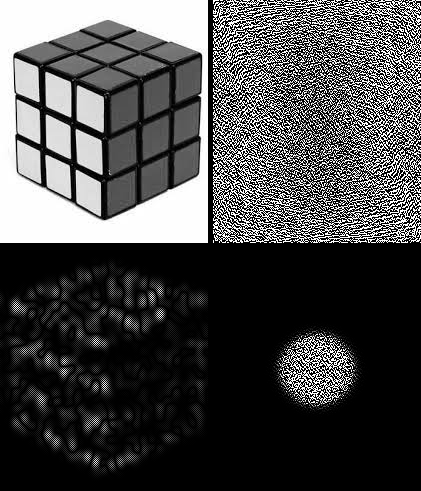

In [ ]:
mask = create_matrix(243,208,sigmax=10,sigmay=10)
masked_fft_img = mask * fft_img
ifft_img = ifft2(masked_fft_img)

# concatanate image Horizontally
black_line = np.zeros((243,5))
Hori1 = np.concatenate((img, black_line ,fft_img), axis=1)
Hori2 = np.concatenate((ifft_img, black_line, masked_fft_img), axis=1)

black_line = np.zeros((5,421))
# concatanate image Vertically
Verti = np.concatenate((Hori1, black_line , Hori2), axis=0)
  
# cv2.imshow('HORIZONTAL', Hori)
cv2_imshow(Verti)

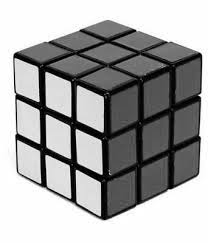

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


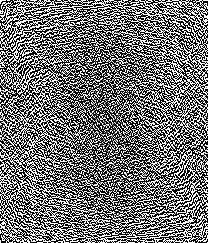

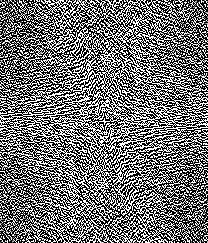

In [ ]:
fft_img = np.fft.fft2(img)
# shift FFT to the center
fft_img_shift = np.fft.fftshift(fft_img)

cv2_imshow(img)
cv2_imshow(fft_img)
cv2_imshow(fft_img_shift)